- ### <ins>t-SNE using Scikit-Learn

shape of sample data :  (1000, 784)


/home/ranjan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


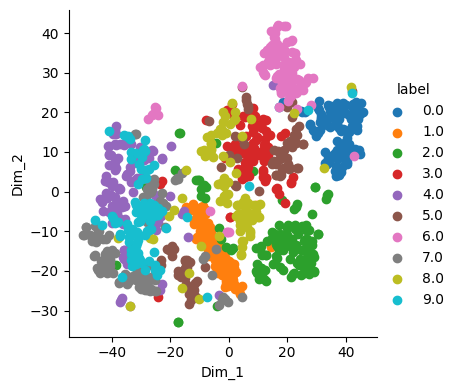

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# laoding dataset
df = pd.read_csv('./mnist_train.csv')

# pick first 1K data-points to work on for fast processing
label = df["label"].head(1000)
data = df.drop("label",axis=1).head(1000)
print("shape of sample data : ",data.shape)

# column standardization
standardized_data =  StandardScaler().fit_transform(data)  


#configuring the parameters
# the numnber of components = 2 (2-Dimension)
# default perplexity = 30
# defalut learning rate = 200
# default Maximum number of iteration for the optimization = 1000
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data)


# creating a new data frame which helps us in plotting the result data
tsne_data = np.vstack((tsne_data.T, label)).T 
tsne_df = pd.DataFrame(data = tsne_data, columns=("Dim_1","Dim_2","label"))

# plotting the result of data
sns.FacetGrid(tsne_df, hue = "label", height=4).map(plt.scatter,"Dim_1","Dim_2").add_legend()
plt.show()

- ### <ins> running t-SNE for different perplexity : 2, 30 , 50 , 100, 1000

/home/ranjan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


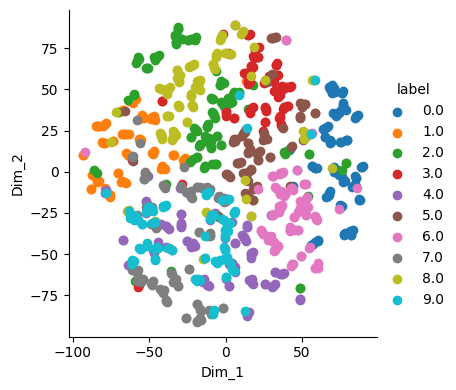

Perplxity :  2


/home/ranjan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


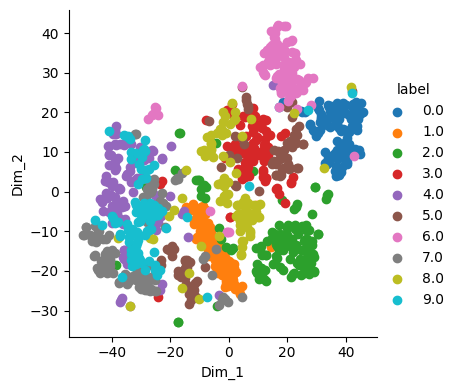

Perplxity :  30


/home/ranjan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


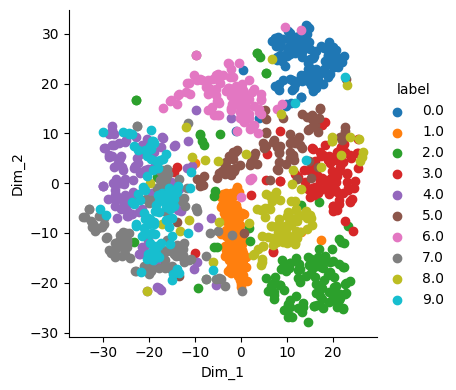

Perplxity :  50


/home/ranjan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


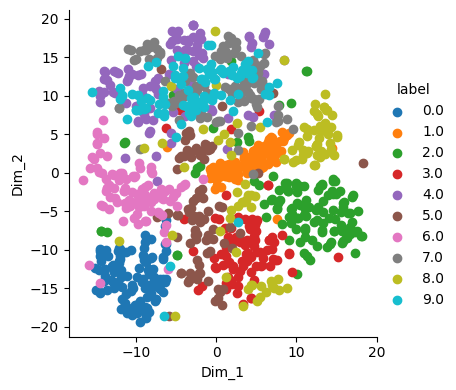

Perplxity :  100


/home/ranjan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


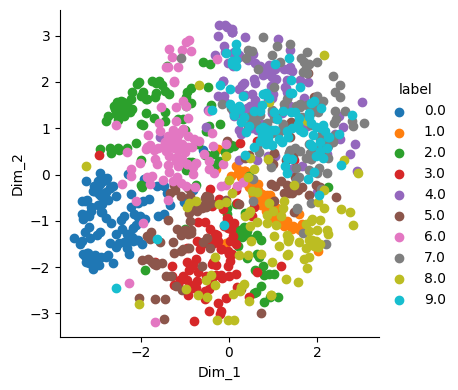

Perplxity :  500


In [7]:
for p in [2,30,50,100,500]:
    model = TSNE(n_components=2, random_state=0,perplexity=p)
    tsne_data = model.fit_transform(data)
    tsne_data = np.vstack((tsne_data.T, label)).T 
    tsne_df = pd.DataFrame(data = tsne_data, columns=("Dim_1","Dim_2","label"))
    sns.FacetGrid(tsne_df, hue = "label", height=4).map(plt.scatter,"Dim_1","Dim_2").add_legend()
    plt.show()
    print("Perplxity : ", p)
    